# import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read data

In [2]:
raw_data=pd.read_csv(r'E:\zeyad\Data secince projects\Sports wear\full_gen_data.csv')

In [3]:
raw_data.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [4]:
raw_data.shape

(100000, 24)

# checking for missing values

In [5]:
raw_data.isnull().sum()

country           0
article           0
sales             0
regular_price     0
current_price     0
ratio             0
retailweek        0
promo1            0
promo2            0
customer_id       0
article.1         0
productgroup      0
category          0
cost              0
style             0
sizes             0
gender            0
rgb_r_main_col    0
rgb_g_main_col    0
rgb_b_main_col    0
rgb_r_sec_col     0
rgb_g_sec_col     0
rgb_b_sec_col     0
label             0
dtype: int64

# checking for duplicates

In [6]:
raw_data.duplicated().sum()

0

# understanding the data

In [7]:
raw_data.describe()

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,56.781800,52.391200,28.290800,0.545646,0.061900,0.004900,2721.726500,6.517000,161.400000,139.600000,133.500000,207.700000,181.400000,209.900000,0.13928
std,87.934743,35.272128,22.578343,0.194363,0.240975,0.069829,1908.085499,3.914728,39.790147,63.641814,81.148727,35.313205,23.474359,45.306849,0.34624
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000,1.000000,1.290000,79.000000,26.000000,0.000000,164.000000,155.000000,155.000000,0.00000
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.000000,1017.000000,2.290000,138.000000,104.000000,57.000000,164.000000,155.000000,155.000000,0.00000
50%,26.000000,40.950000,20.950000,0.525044,0.000000,0.000000,2091.000000,6.950000,160.000000,144.000000,143.000000,205.000000,187.000000,238.000000,0.00000
75%,64.000000,79.950000,37.950000,0.699248,0.000000,0.000000,4570.250000,9.600000,205.000000,181.000000,205.000000,255.000000,211.000000,255.000000,0.00000
max,898.000000,197.950000,195.950000,1.000000,1.000000,1.000000,5999.000000,13.290000,205.000000,238.000000,250.000000,255.000000,211.000000,255.000000,1.00000


In [8]:
raw_data.dtypes

country            object
article            object
sales               int64
regular_price     float64
current_price     float64
ratio             float64
retailweek         object
promo1              int64
promo2              int64
customer_id       float64
article.1          object
productgroup       object
category           object
cost              float64
style              object
sizes              object
gender             object
rgb_r_main_col      int64
rgb_g_main_col      int64
rgb_b_main_col      int64
rgb_r_sec_col       int64
rgb_g_sec_col       int64
rgb_b_sec_col       int64
label               int64
dtype: object

# EDA

<Axes: >

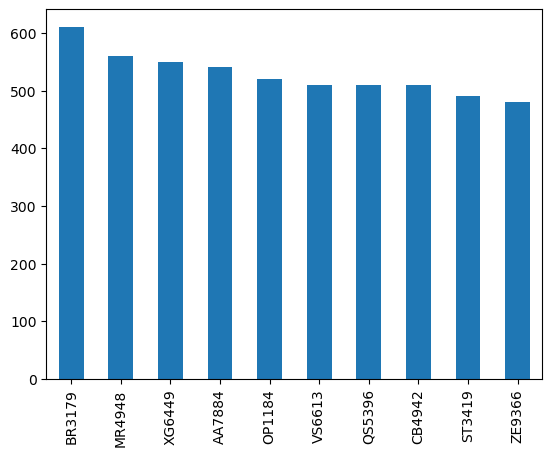

In [9]:
raw_data['article'].value_counts().head(10).plot(kind='bar')

In [10]:
top10_articles=raw_data['article'].value_counts().head(10).index

In [11]:
top10_articles_df=raw_data[raw_data['article'].isin(top10_articles)]

In [12]:
top10_articles_df=top10_articles_df.groupby(['article','label']).size().reset_index().rename(columns={0:'count'})

<Axes: xlabel='article', ylabel='count'>

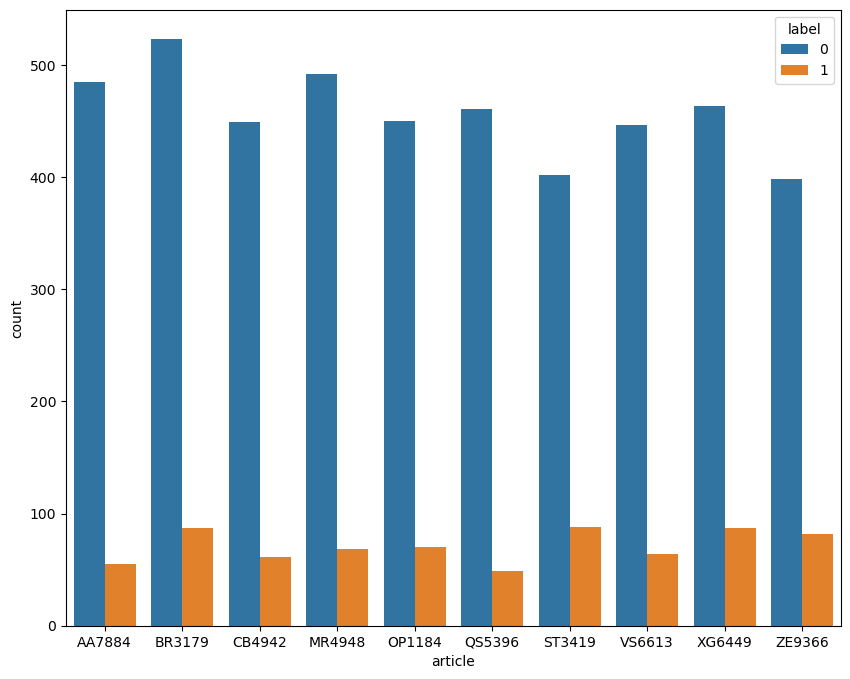

In [13]:
plt.figure(figsize=(10,8))
sns.barplot(x='article',y='count',data=top10_articles_df,hue='label')

In [14]:
raw_data['customer_id']=raw_data['customer_id'].astype(str)

In [15]:
raw_data['country'].unique()

array(['Germany', 'Austria', 'France'], dtype=object)

<Axes: xlabel='country,label'>

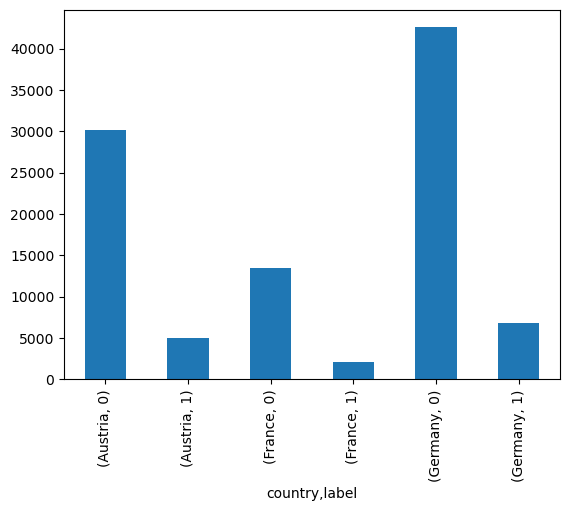

In [16]:
raw_data.groupby(['country','label'])['label'].size().plot(kind='bar')

<Axes: ylabel='productgroup,category,label'>

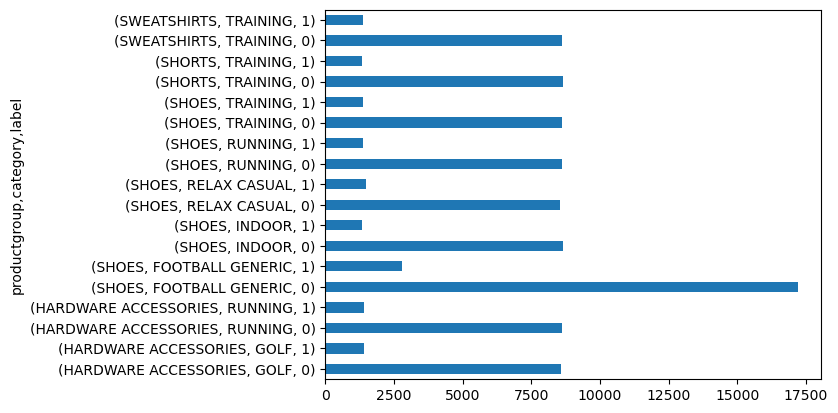

In [17]:
raw_data.groupby(['productgroup','category','label'])['label'].size().plot(kind='barh')

In [18]:
raw_data['retailweek']=pd.to_datetime(raw_data['retailweek'])

In [19]:
raw_data['year']=raw_data['retailweek'].dt.year

In [20]:
year_label=raw_data.groupby(['year','label']).size().reset_index().rename(columns={0:'count'})

<Axes: xlabel='year', ylabel='count'>

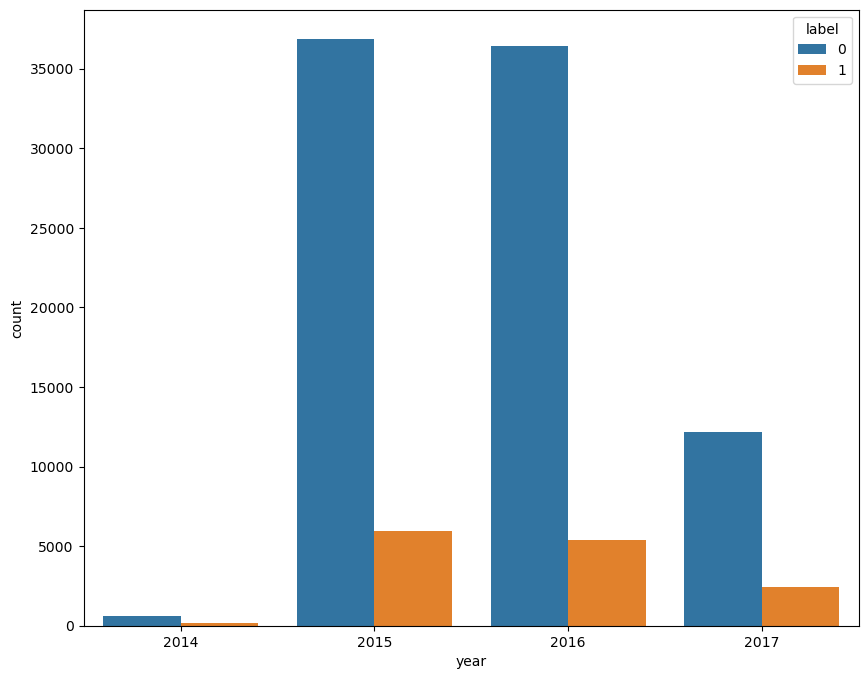

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(x='year',y='count',data=year_label,hue='label')

In [22]:
raw_data.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0,2016
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0,2016
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0,2016
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0,2016
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0,2016


In [23]:
raw_data['customer_id'].value_counts()

1692.0    80
1264.0    80
1111.0    80
1240.0    70
22.0      70
          ..
1819.0    10
5375.0    10
2565.0    10
4296.0    10
5431.0    10
Name: customer_id, Length: 4549, dtype: int64

In [24]:
Top20_customers=raw_data['customer_id'].value_counts().sort_values(ascending=False).head(20).reset_index()['index'].values.tolist()

In [25]:
top_20_customersdf=raw_data[raw_data['customer_id'].isin(Top20_customers)]

In [26]:
top_20_customersdf=top_20_customersdf.groupby(['customer_id','label']).size().reset_index()

<Axes: xlabel='customer_id', ylabel='0'>

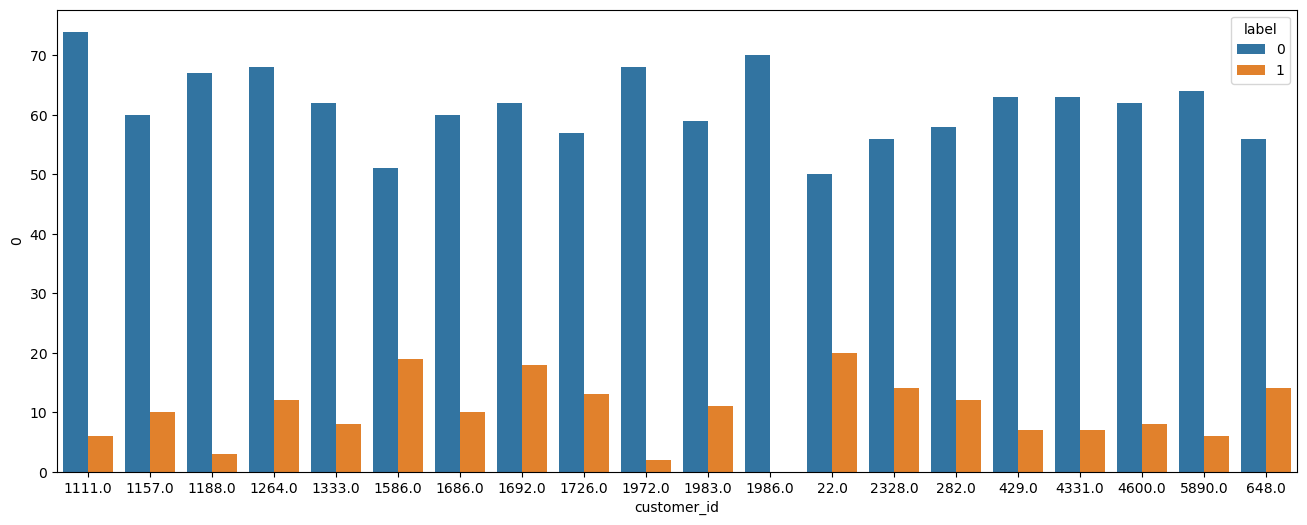

In [27]:
plt.figure(figsize=(16,6))
sns.barplot(x='customer_id',y=0,data=top_20_customersdf,hue='label')

# checking correlation for feature selection

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9460\2342261346.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_data.corr(),annot=True)


<Axes: >

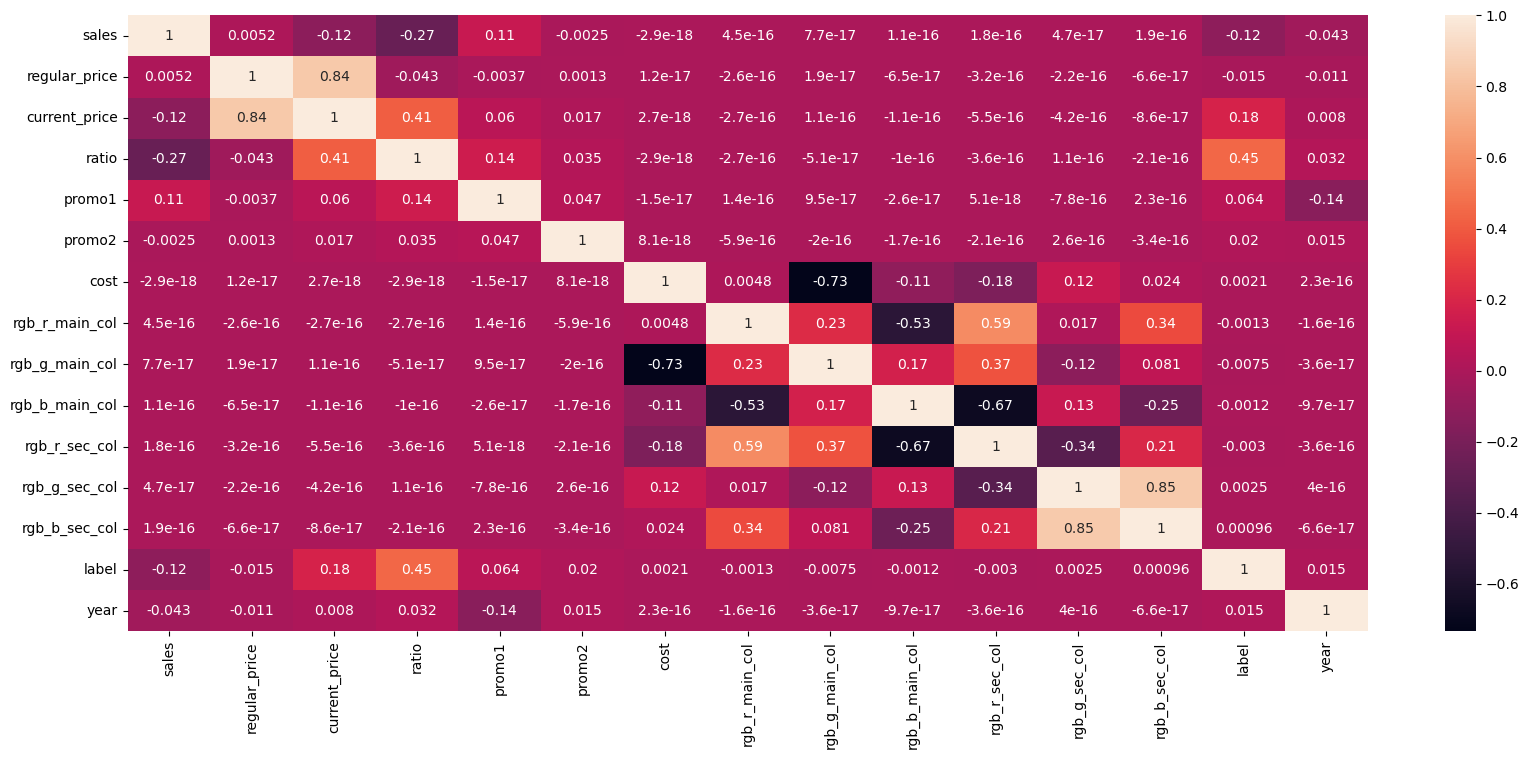

In [28]:
plt.figure(figsize=(20,8))
sns.heatmap(raw_data.corr(),annot=True)

# feature selection

In [29]:
df=raw_data.drop(['rgb_r_main_col','rgb_g_main_col','rgb_b_main_col','rgb_r_sec_col','rgb_g_sec_col','rgb_b_sec_col'], axis=1)

In [30]:
df.drop('regular_price',axis=1,inplace=True)

In [31]:
df.drop('article',axis=1,inplace=True)

In [32]:
df.drop('retailweek',axis=1,inplace=True)

In [33]:
df.drop('customer_id',axis=1,inplace=True)

In [34]:
df.head()

,country,sales,current_price,ratio,promo1,promo2,article.1,productgroup,category,cost,style,sizes,gender,label,year
0,Germany,28,3.95,0.663866,0,0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,0,2016
1,Germany,28,3.95,0.663866,0,0,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,0,2016
2,Germany,28,3.95,0.663866,0,0,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,0,2016
3,Germany,28,3.95,0.663866,0,0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,0,2016
4,Germany,28,3.95,0.663866,0,0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,0,2016


In [35]:
df['article.1'].value_counts()

OC6355    10000
AP5568    10000
CB8861    10000
LI3529    10000
GG8661    10000
TX1463    10000
PC6383    10000
VT7698    10000
FG2965    10000
AC7347    10000
Name: article.1, dtype: int64

In [36]:
final_data=df.drop(['article.1','category'],axis=1)

In [37]:
final_data.head()

,country,sales,current_price,ratio,promo1,promo2,productgroup,cost,style,sizes,gender,label,year
0,Germany,28,3.95,0.663866,0,0,SHOES,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,0,2016
1,Germany,28,3.95,0.663866,0,0,SHORTS,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,0,2016
2,Germany,28,3.95,0.663866,0,0,HARDWARE ACCESSORIES,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,0,2016
3,Germany,28,3.95,0.663866,0,0,SHOES,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,0,2016
4,Germany,28,3.95,0.663866,0,0,SHOES,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,0,2016


# splitting my data

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [39]:
x=final_data.drop('label',axis=1).values
y=final_data['label'].values

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=444)

In [41]:
x_train.shape

(80000, 12)

# One hot encode

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [46]:
x_train

array([['Austria', 8, 68.95, ..., 'xxs,xs,s,m,l,xl,xxl', 'women', 2017],
       ['Germany', 32, 9.95, ..., 'xxs,xs,s,m,l,xl,xxl', 'women', 2016],
       ['Austria', 39, 2.95, ..., 'xs,s,m,l,xl', 'unisex', 2015],
       ...,
       ['Austria', 69, 27.95, ..., 'xxs,xs,s,m,l,xl,xxl', 'women', 2017],
       ['Austria', 1, 43.95, ..., 'xxs,xs,s,m,l,xl,xxl', 'women', 2015],
       ['France', 3, 77.95, ..., 'xxs,xs,s,m,l,xl,xxl', 'women', 2017]],
      dtype=object)

In [47]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0,6,8,9,10,11])],   
    remainder='passthrough'                                         
)

In [48]:
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

In [49]:
x_train.shape

(80000, 26)

# oversampling my minority label 

In [50]:
final_data['label'].value_counts()

0    86072
1    13928
Name: label, dtype: int64

In [51]:
import imblearn

In [52]:
from imblearn.over_sampling import ADASYN
from collections import Counter

In [53]:
oversample = ADASYN()

In [54]:
x_transform, y_transform = oversample.fit_resample(x_train, y_train)

In [55]:
print(Counter(y_transform))

Counter({0: 68858, 1: 67932})


In [61]:
x_transform.shape

(136790, 26)

# model 1

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
from imblearn.pipeline import make_pipeline

In [64]:
steps=[('scaler',StandardScaler()),('tree',RandomForestClassifier(n_estimators=10))]

In [65]:
pipeline=Pipeline(steps)

In [66]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import RepeatedStratifiedKFold

In [67]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [68]:
scores = cross_val_score(pipeline, x_transform, y_transform, scoring='f1',error_score='raise', cv=cv, n_jobs=-1)

In [69]:
scores

array([0.89735626, 0.8973022 , 0.8980858 , 0.89801164, 0.89603511,
       0.90059537, 0.89752329, 0.9       , 0.89536464, 0.899562  ,
       0.90024957, 0.89908257, 0.89890011, 0.89980354, 0.90096088,
       0.89611372, 0.89565151, 0.90127196, 0.89237973, 0.89704552,
       0.89539875, 0.89277866, 0.90015824, 0.89451413, 0.89948841,
       0.89604707, 0.89883386, 0.90410338, 0.89491987, 0.89612356])

In [70]:
from numpy import mean
score = mean(scores)

In [71]:
score

0.8977887115947608

In [72]:
print('F1 Score: %.3f' % score)

F1 Score: 0.898


# After studying well the last model it turned out that this is a misleading model and canot be used as using crossvalidation after oversampling will result in a wrong results as there will be data leakage (same points on training and validation data) but i decided to leave it for clarification

# model 2: logistic regression with oversampling

In [73]:
steps2=[('scaler',StandardScaler()),('log',LogisticRegression())]

In [74]:
pipeline2=Pipeline(steps2)

In [75]:
pipeline2.fit(x_transform,y_transform)

Pipeline(steps=[('scaler', StandardScaler()), ('log', LogisticRegression())])

In [76]:
y_pred=pipeline2.predict(x_test)

In [77]:
pipeline2.score(x_test,y_test)

0.7623

In [78]:
from sklearn.metrics import confusion_matrix,classification_report

In [79]:
confusion_matrix(y_test,y_pred)

array([[12995,  4219],
       [  535,  2251]], dtype=int64)

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.75      0.85     17214
           1       0.35      0.81      0.49      2786

    accuracy                           0.76     20000
   macro avg       0.65      0.78      0.67     20000
weighted avg       0.88      0.76      0.80     20000



# The previous model was a simple Logistic Regression which we used after oversampling

# model 3: k nearest neighbors
# I will try now to make a better performance by using oversampling inside cv so there will be no oversampling in validation data

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [51]:
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import RandomOverSampler

In [150]:
pipeline3 = make_pipeline(RandomOverSampler(sampling_strategy='minority',random_state=44),StandardScaler(), 
                             KNeighborsClassifier(n_neighbors=35))

In [151]:
scores = cross_val_score(pipeline2, x_train, y_train, scoring='f1_macro',error_score='raise', cv=cv, n_jobs=-1)

In [152]:
scores

array([0.62346858, 0.62069554, 0.62660443, 0.63336631, 0.62640034,
       0.63257702, 0.62627227, 0.62808863, 0.62494724, 0.62255605,
       0.63206394, 0.62743774, 0.61943171, 0.62319031, 0.62872563,
       0.632262  , 0.63338801, 0.62067844, 0.62297853, 0.62395835,
       0.62667635, 0.62498871, 0.62608414, 0.62625107, 0.62704557,
       0.63552642, 0.62649384, 0.62891713, 0.6269168 , 0.62769319])

In [153]:
from numpy import mean
score = mean(scores)

In [154]:
score

0.6268561436476017

# Conclusion: model 2 Logistic Regression is the best model